In [1]:
import numpy as np
import pandas as pd
from numpy import linalg as LA 
import scipy.io

In [2]:
f1 = scipy.io.loadmat('PaviaU.mat')
f2 = scipy.io.loadmat('PaviaU_gt.mat')
data1=f1['paviaU']
data2=f2['paviaU_gt']
data2.shape
data1[0,0,:]

array([ 647,  499,  464,  371,  291,  319,  365,  322,  296,  305,  277,
        219,  219,  222,  201,  162,  157,  183,  204,  194,  198,  216,
        249,  284,  294,  322,  338,  342,  336,  342,  362,  365,  348,
        341,  324,  316,  293,  274,  251,  244,  263,  248,  236,  254,
        255,  240,  223,  203,  202,  191,  185,  200,  203,  181,  168,
        174,  185,  187,  165,  151,  144,  140,  149,  169,  192,  227,
        287,  376,  493,  633,  763,  913, 1149, 1442, 1759, 2102, 2425,
       2689, 2895, 3058, 3196, 3252, 3195, 3297, 3542, 3550, 3537, 3545,
       3514, 3477, 3468, 3433, 3408, 3420, 3416, 3335, 3256, 3226, 3205,
       3210, 3221, 3238, 3250], dtype=uint16)

In [3]:
dataX=data1.reshape(-1,103)
x1,y1=dataX.shape
dataX[0,:]
data1=dataX
data1=data1-(1/x1)*np.sum(data1,axis=0)
data1.shape

(207400, 103)

In [4]:
dataY=data2.reshape(-1,1)
dataY.shape
out=dataY

In [5]:
W1=np.random.randn(26,y1)*np.sqrt(1/y1)
W1.shape
W1[:5,:]
bias1=np.random.randn(26,1)*np.sqrt(1/y1)

In [6]:
def sigmoid(data):
    return 1/(1+np.exp(-1*data))
def maximizer(data):
    return np.argmax(data,axis=1)

In [7]:
W2=np.random.randn(10,26)*np.sqrt(1/26)
W2.shape
bias2=np.random.randn(10,1)*np.sqrt(1/26)

In [8]:
def Forward_prop(W1,bias1,W2,bias2,data1):
    data2=np.dot(W1,data1.T)
    data2=data2+bias1
    act_data2=sigmoid(data2)
    x3,y3=act_data2.shape
    data3=np.dot(W2,act_data2)
    act_data3=sigmoid(data3).T
    return [act_data3,act_data2]

In [9]:
act_data3,act_data2=Forward_prop(W1,bias1,W2,bias2,data1)
prediction_final=maximizer(act_data3)
c=0
for i,j in zip(prediction_final,out):
    if i==j:
        c+=1
print(c/x1*100)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.6036644165863067


In [10]:
data_X=np.zeros((x1,10))
print(data_X.shape)
for i,j in zip(out,range(0,x1)):
    data_X[j,i%10]=1
data_X

(207400, 10)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [11]:
alpha=0.99
loss=1/x1*np.sum(np.sum((act_data3-data_X)**2,axis=1),axis=0)
loss

3.147460098096735

In [12]:
def Backward_prop(act_data3,data_X,act_data2,W2,W1,bias1,bias2):
    dz2=act_data3-data_X
    for i in range(0,10):
        if i==0:
            dw2=np.sum(dz2[:,i].T*act_data2,axis=1)
            db2=np.sum(dz2[:,i],axis=0)
        else:
            x=np.sum(dz2[:,i].T*act_data2,axis=1)
            y=np.sum(dz2[:,i],axis=0)
            dw2=np.vstack((dw2,x))
            db2=np.vstack((db2,y))
    W2=W2-alpha*1/x1*dw2
    bias2=bias2-alpha*1/x1*db2
    dz1=np.dot(W2.T,dz2.T)*((act_data2*(1-act_data2)))
    dw1=np.dot(dz1,data1)
    db1=np.sum(dz1,axis=1)
    db1=db1.reshape(26,1)
    W1=W1-alpha*1/x1*dw1
    bias1=bias1-alpha*1/x1*db1
    return [W1,bias1,W2,bias2]

In [13]:
for i in range(0,30):
    W1,bias1,W2,bias2=Backward_prop(act_data3,data_X,act_data2,W2,W1,bias1,bias2)
    act_data3,act_data2=Forward_prop(W1,bias1,W2,bias2,data1)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [14]:
acc=[]
prediction_final=maximizer(act_data3)
c=0
for i,j in zip(prediction_final,out):
    if i==j:
        c+=1
print(c/x1*100)
acc.append(c/x1*100)

79.37512054001928


In [15]:
loss=1/x1*np.sum(np.sum((act_data3-data_X)**2,axis=1),axis=0)
loss

0.3447378633586949

In [16]:
l=[52, 26]
# for i in l:
w,v=LA.eig(np.dot(data1.T,data1))
eig=np.vstack((v,w))
srt_eig=eig[eig[-1,:].argsort()]
srt_eig

array([[ 5.04631087e-02,  1.82681916e-01,  1.59683868e-02, ...,
        -1.98331357e-02,  1.56572102e-02,  1.80493767e-01],
       [ 4.64828898e-02,  1.84445701e-01,  2.35510290e-02, ...,
        -4.74274538e-02, -3.22229096e-03,  6.63173083e-02],
       [ 4.33735438e-02,  1.89970923e-01,  2.24212363e-02, ...,
         2.68209334e-01,  5.01165829e-02,  2.36283468e-02],
       ...,
       [ 7.22059489e-02, -3.50634518e-02,  1.07588983e-01, ...,
        -2.89346452e-04, -6.40386925e-04,  1.57785721e-04],
       [ 6.54873159e-02, -3.06804578e-02,  1.03809509e-01, ...,
         1.54292873e-04, -3.87841028e-05, -1.47820274e-04],
       [ 5.78599208e-02, -2.56914589e-02,  9.72378629e-02, ...,
         6.16175128e-05, -2.16369653e-05,  1.51868139e-05]])

In [17]:
srt_eig[:,0]
eig[:,0]

array([5.78599208e-02, 6.54873159e-02, 7.22059489e-02, 7.94397867e-02,
       8.52469793e-02, 8.90675776e-02, 9.23493619e-02, 9.48139698e-02,
       9.72996128e-02, 1.00227418e-01, 1.03294356e-01, 1.05112993e-01,
       1.07196457e-01, 1.09163083e-01, 1.10830409e-01, 1.12166141e-01,
       1.13718411e-01, 1.14863315e-01, 1.15636925e-01, 1.16345286e-01,
       1.16705799e-01, 1.16844451e-01, 1.16607221e-01, 1.16358955e-01,
       1.16646026e-01, 1.17478954e-01, 1.17279637e-01, 1.16710518e-01,
       1.16353825e-01, 1.16718170e-01, 1.17382170e-01, 1.17539948e-01,
       1.17790414e-01, 1.18768752e-01, 1.19858938e-01, 1.20935702e-01,
       1.21819902e-01, 1.22381064e-01, 1.22532817e-01, 1.22298613e-01,
       1.21739797e-01, 1.21011686e-01, 1.20469110e-01, 1.20179436e-01,
       1.20143477e-01, 1.20175711e-01, 1.19925800e-01, 1.19540011e-01,
       1.19371909e-01, 1.18572849e-01, 1.18501482e-01, 1.18991841e-01,
       1.19139306e-01, 1.19385446e-01, 1.19183878e-01, 1.19065118e-01,
      

In [18]:
basis=srt_eig[:,-75:-1]
basis1=np.hstack((basis,srt_eig[:,-1].reshape(-1,1)))
basis1.shape

(103, 75)

In [19]:
data_fin=np.dot(data1,basis1)
x1,y1=data_fin.shape
data1=data_fin
data1=data1-(1/x1)*np.sum(data1,axis=0)

In [20]:
W1=np.random.randn(26,y1)*np.sqrt(1/y1)
W1.shape
W1[:5,:]
bias1=np.random.randn(26,1)*np.sqrt(1/y1)

In [21]:
W2=np.random.randn(10,26)*np.sqrt(1/26)
W2.shape
bias2=np.random.randn(10,1)*np.sqrt(1/26)

In [22]:
act_data3,act_data2=Forward_prop(W1,bias1,W2,bias2,data1)
prediction_final=maximizer(act_data3)
c=0
for i,j in zip(prediction_final,out):
    if i==j:
        c+=1
print(c/x1*100)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


1.1923818707810994


In [23]:
for i in range(0,30):
    W1,bias1,W2,bias2=Backward_prop(act_data3,data_X,act_data2,W2,W1,bias1,bias2)
    act_data3,act_data2=Forward_prop(W1,bias1,W2,bias2,data1)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [24]:
prediction_final=maximizer(act_data3)
c=0
for i,j in zip(prediction_final,out):
    if i==j:
        c+=1
print(c/x1*100)
acc.append(c/x1*100)

79.3731918997107


In [25]:
f1 = scipy.io.loadmat('PaviaU.mat')
data1=f1['paviaU']
dataX=data1.reshape(-1,103)
x1,y1=dataX.shape
dataX[0,:]
data1=dataX

In [26]:
l=[52, 26]
for i in l:
    basis=srt_eig[:,-1*i:-1]
    basis1=np.hstack((basis,srt_eig[:,-1].reshape(-1,1)))
    basis1.shape
    data_fin=np.dot(data1,basis1)
    x1,y1=data_fin.shape
    data1=data_fin
    W1=np.random.randn(26,y1)*np.sqrt(1/y1)
    W1.shape
    W1[:5,:]
    bias1=np.random.randn(26,1)*np.sqrt(1/y1)
    W2=np.random.randn(10,26)*np.sqrt(1/26)
    W2.shape
    bias2=np.random.randn(10,1)*np.sqrt(1/26)
    act_data3,act_data2=Forward_prop(W1,bias1,W2,bias2,data1)
    prediction_final=maximizer(act_data3)
    c=0
    for i,j in zip(prediction_final,out):
        if i==j:
            c+=1
    print(c/x1*100)
    for i in range(0,30):
        W1,bias1,W2,bias2=Backward_prop(act_data3,data_X,act_data2,W2,W1,bias1,bias2)
        act_data3,act_data2=Forward_prop(W1,bias1,W2,bias2,data1)
    prediction_final=maximizer(act_data3)
    c=0
    for i,j in zip(prediction_final,out):
        if i==j:
            c+=1
    print(c/x1*100)
    acc.append(c/x1*100)
    f1 = scipy.io.loadmat('PaviaU.mat')
    data1=f1['paviaU']
    dataX=data1.reshape(-1,103)
    x1,y1=dataX.shape
    dataX[0,:]
    data1=dataX
    data1=data1-(1/x1)*np.sum(data1,axis=0)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


1.3461909353905497
79.3529411764706
4.693346190935391
79.37560270009644


4

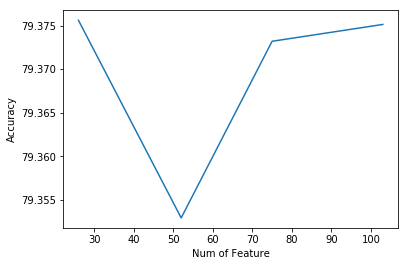

In [28]:
l=[103,75,52,26]
import matplotlib.pyplot as plt
plt.plot(l,acc)
plt.xlabel('Num of Feature') 
plt.ylabel('Accuracy')
len(acc)